In [ ]:
# 1. Feature scaling is extremely important for k-means algorithms because they rely on euclidean distances to asign clusters.
# 2. b
# 3. The initial centroids have a lot to deal with the speed of convergence. If the initial cluster centriods are random it may take a high number of itterations making the model take awhile.

In [7]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans


## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'ryan-greiner-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'Mall_Customers.csv'
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading CSV file
customers = pd.read_csv(file_content_stream)
customers = mall.dropna()
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
X = customers[['Gender', 'Age', 'Annual Income (k$)']]
X['Gender'] = np.where(X['Gender'] == 'Male', 1, 0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

/tmp/ipykernel_32193/3494089549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = np.where(X['Gender'] == 'Male', 1, 0)


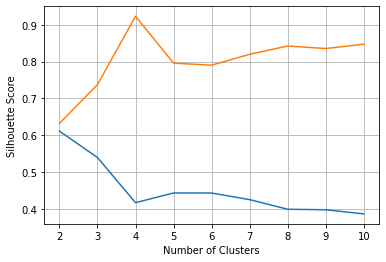

In [25]:
silho_score = list()
cali_score = list()
davies_score = list()
for i in range(2, 11):
    kmeans_md = KMeans(n_clusters = i, n_init = 20).fit(X)
    silho_score.append(silhouette_score(X, kmeans_md.labels_))
    cali_score.append(calinski_harabasz_score(X, kmeans_md.labels_))
    davies_score.append(davies_bouldin_score(X, kmeans_md.labels_))
    
plt.plot(range(2, 11), silho_score)
plt.plot(range(2, 11), davies_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

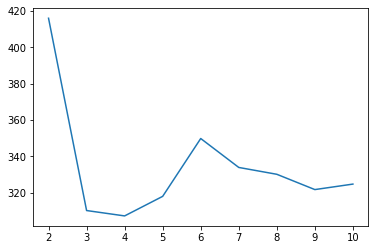

In [26]:
plt.plot(range(2, 11), cali_score)

In [ ]:
# The Ideal Number of clusters is 2

In [38]:
kmeans_md = KMeans(n_clusters = 2, n_init = 20).fit(X)
customers['Cluster'] = kmeans_md.labels_
cluster2_0 = customers[customers['Cluster'] == 0]
cluster2_1 = customers[customers['Cluster'] == 1]
cluster2_0.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,112.000000,112.000000,112.000000,112.000000,112.0
mean,97.562500,38.098214,59.250000,51.526786,0.0
std,58.276412,12.644095,26.011952,24.114950,0.0
min,3.000000,18.000000,16.000000,5.000000,0.0
25%,46.750000,29.000000,39.750000,35.000000,0.0
50%,94.500000,35.000000,60.000000,50.000000,0.0
75%,148.250000,47.500000,77.250000,73.000000,0.0
max,197.000000,68.000000,126.000000,99.000000,0.0


In [39]:
cluster2_0['Gender'].value_counts()

Female    112
Name: Gender, dtype: int64

In [40]:
cluster2_1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,88.000000,88.000000,88.000000,88.000000,88.0
mean,104.238636,39.806818,62.227273,48.511364,1.0
std,57.483830,15.514812,26.638373,27.896770,0.0
min,1.000000,18.000000,15.000000,1.000000,1.0
25%,59.500000,27.750000,45.500000,24.500000,1.0
50%,106.500000,37.000000,62.500000,50.000000,1.0
75%,151.250000,50.500000,78.000000,70.000000,1.0
max,200.000000,70.000000,137.000000,97.000000,1.0


In [42]:
cluster2_1['Gender'].value_counts()

Male    88
Name: Gender, dtype: int64

In [ ]:
# Clustering into just 2 groups only gives us male and female. This does not give us much information so use the second best number of clusters(6)

In [43]:
kmeans_md = KMeans(n_clusters = 6, n_init = 20).fit(X)
customers['Cluster'] = kmeans_md.labels_
cluster6_0 = customers[customers['Cluster'] == 0]
cluster6_1 = customers[customers['Cluster'] == 1]
cluster6_2 = customers[customers['Cluster'] == 2]
cluster6_3 = customers[customers['Cluster'] == 3]
cluster6_4 = customers[customers['Cluster'] == 4]
cluster6_5 = customers[customers['Cluster'] == 5]
cluster6_0.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,26.000000,26.000000,26.000000,26.000000,26.0
mean,63.000000,23.961538,43.461538,53.538462,0.0
std,46.983401,6.009864,20.453324,24.734156,0.0
min,1.000000,18.000000,15.000000,5.000000,0.0
25%,22.500000,19.000000,24.250000,42.250000,0.0
50%,57.000000,21.500000,44.000000,55.500000,0.0
75%,99.000000,26.750000,60.750000,71.250000,0.0
max,163.000000,37.000000,81.000000,92.000000,0.0


In [45]:
cluster6_0['Gender'].value_counts()

Male    26
Name: Gender, dtype: int64

In [ ]:
# Cluster 0 describes young male customers

In [46]:
cluster6_1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,38.000000,38.000000,38.000000,38.000000,38.0
mean,52.052632,26.789474,39.421053,55.657895,1.0
std,38.021294,5.937321,17.324614,22.388796,0.0
min,3.000000,18.000000,16.000000,6.000000,1.0
25%,17.750000,22.000000,21.500000,42.000000,1.0
50%,45.000000,25.500000,39.000000,53.000000,1.0
75%,87.250000,31.000000,56.250000,73.000000,1.0
max,125.000000,40.000000,70.000000,99.000000,1.0


In [47]:
cluster6_1['Gender'].value_counts()

Female    38
Name: Gender, dtype: int64

In [ ]:
# Cluster 1 describes young female customers

In [48]:
cluster6_2.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,28.000000,28.000000,28.000000,28.000000,28.0
mean,79.250000,58.821429,51.678571,38.035714,2.0
std,42.662001,7.746223,17.780667,18.302969,0.0
min,9.000000,47.000000,19.000000,3.000000,2.0
25%,55.500000,52.750000,43.000000,25.500000,2.0
50%,78.000000,59.000000,54.000000,46.000000,2.0
75%,105.750000,66.250000,62.250000,51.000000,2.0
max,179.000000,70.000000,93.000000,60.000000,2.0


In [49]:
cluster6_2['Gender'].value_counts()

Male    28
Name: Gender, dtype: int64

In [ ]:
# Cluster 2 describes older male customers

In [50]:
cluster6_3.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,160.153846,35.615385,86.102564,57.435897,3.0
std,26.391325,6.380956,16.484115,28.381605,0.0
min,94.000000,25.000000,60.000000,7.000000,3.0
25%,141.500000,31.000000,75.000000,30.000000,3.0
50%,160.000000,35.000000,78.000000,71.000000,3.0
75%,184.500000,39.000000,98.500000,84.000000,3.0
max,197.000000,54.000000,126.000000,95.000000,3.0


In [51]:
cluster6_3['Gender'].value_counts()

Female    39
Name: Gender, dtype: int64

In [ ]:
# Cluster 3 describes middle-aged female customers

In [52]:
cluster6_4.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,35.000000,35.000000,35.000000,35.000000,35.0
mean,77.228571,53.142857,50.857143,40.457143,4.0
std,38.749638,7.420730,15.478909,16.355145,0.0
min,13.000000,42.000000,20.000000,5.000000,4.0
25%,49.000000,49.000000,41.000000,33.500000,4.0
50%,73.000000,50.000000,50.000000,46.000000,4.0
75%,99.500000,57.500000,61.000000,52.000000,4.0
max,175.000000,68.000000,88.000000,59.000000,4.0


In [53]:
cluster6_4['Gender'].value_counts()

Female    35
Name: Gender, dtype: int64

In [ ]:
# Cluster 4 describes older female customers

In [54]:
cluster6_5.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,34.000000,34.000000,34.000000,34.000000,34.0
mean,156.352941,36.264706,85.264706,53.294118,5.0
std,29.702446,6.373757,19.403700,34.315408,0.0
min,78.000000,25.000000,54.000000,1.000000,5.0
25%,139.000000,32.000000,73.500000,17.250000,5.0
50%,158.000000,36.000000,78.000000,65.500000,5.0
75%,177.000000,40.000000,87.750000,86.750000,5.0
max,200.000000,50.000000,137.000000,97.000000,5.0


In [55]:
cluster6_5['Gender'].value_counts()

Male    34
Name: Gender, dtype: int64

In [ ]:
# Cluster 5 describes middle-aged male customers